In [13]:
import numpy as np
import matplotlib.pylab as plt
import math as math
from scipy.optimize import fmin
from iminuit import Minuit, describe, Struct

%matplotlib  notebook


In [14]:
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))

def calc_pull(iterations):
    pull_mean_list=[]
    pull_width_list=[]
    pull_frac_list=[]
    average_best_mean = average_best_width = average_best_frac = 0
    probability_background=.5
    
    means = []
    widths = []
    frac = []
    fit_means = []
    fit_widths = []
    fit_frac = []
    fit_means_uncert = []
    fit_widths_uncert = []
    fit_frac_uncert = []
    

    for num in range(iterations):
        Nsig = np.random.poisson(300)
        sig_mean = np.random.normal(10.4,0.2)
        sig_width = np.random.normal(.06,.01)
        signal = np.random.normal(sig_mean,sig_width,Nsig)
        Nbkg = 950
        background = 9.0+(2*np.random.random(Nbkg))
        data = signal.copy()
        data = np.append(data,background.copy())
        means.append(sig_mean)
        widths.append(sig_width)
        frac.append(float(Nsig)/(float(Nbkg)+float(Nsig)))
        
        def probability(mean,width,frac):
            x=data
            signal_prob=(1.0/(width*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*(width**2)))
            tot_prob= -np.log(frac*signal_prob+ ((1-frac)*probability_background)).sum()
            return tot_prob
        
        m=Minuit(probability, mean=10.3, error_mean=0.1, limit_mean=(1,20.), width= .02, error_width=0.001, limit_width=(0.001,10), frac= .4, limit_frac=(0.001,1), error_frac=0.001, print_level=0,errordef = 0.5)
        m.migrad()
        if (m.get_fmin().is_valid):
            param=m.values
            err=m.errors
            fit_means.append(param["mean"])
            fit_widths.append(param["width"])
            fit_frac.append(param["frac"])

            fit_means_uncert.append(err["mean"])
            fit_widths_uncert.append(err["width"])
            fit_frac_uncert.append(err["frac"])

            pull_width=(sig_width-param["width"])/err["width"]
            pull_mean=(sig_mean-param["mean"])/err["mean"]
            pull_frac=((float(Nsig)/(float(Nbkg)+float(Nsig)))-param["frac"])/err["frac"]

            pull_mean_list.append(pull_mean)
            pull_width_list.append(pull_width)
            pull_frac_list.append(pull_frac)
            if ((param["frac"])<0.02):
                print sig_mean
                print sig_width
                print float(Nsig)/(float(Nbkg)+float(Nsig))
                m.print_level = 1
                m.migrad()
                
                #plt.figure()
                #plt.hist(data,bins=100)

    return m,[pull_mean_list,pull_width_list,pull_frac_list],[means,widths,frac],[fit_means,fit_widths,fit_frac],[fit_means_uncert,fit_widths_uncert, fit_frac_uncert],iterations


In [15]:
m,pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(200)

10.6786498001
0.0396420477401
0.226384364821


FCN = 849.891803842 
 TOTAL NCALL = 0 
 NCALLS = 37 
 
 
 EDM = 1.19751640021e-08 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,10.2042,0.00732568,0,0,1.0,20.0,
2,width,0.00805209,0.00490356,0,0,0.001,10.0,
3,frac,0.00593789,0.00440591,0,0,0.001,1.0,


10.6464236578
0.0674805844296
0.244833068362


FCN = 870.374566829 
 TOTAL NCALL = 0 
 NCALLS = 16 
 
 
 EDM = 8.94300781439e-10 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,10.0995,0.00314192,0,0,1.0,20.0,
2,width,0.00380796,0.00183857,0,0,0.001,10.0,
3,frac,0.00467464,0.00323686,0,0,0.001,1.0,


10.8748089589
0.0739709738591
0.237560192616


FCN = 862.514946494 
 TOTAL NCALL = 0 
 NCALLS = 19 
 
 
 EDM = 2.46632378431e-11 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,10.2799,0.00512236,0,0,1.0,20.0,
2,width,0.00483849,0.00329465,0,0,0.001,10.0,
3,frac,0.00434973,0.00352283,0,0,0.001,1.0,


10.4061737941
0.0669967430576
0.229521492295


FCN = 670.16019523 
 TOTAL NCALL = 0 
 NCALLS = 180 
 
 
 EDM = 5.35846739442e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,10.4205,0.00550932,0,0,1.0,20.0,
2,width,0.06584,0.00508165,0,0,0.001,10.0,
3,frac,0.240184,0.0170771,0,0,0.001,1.0,


10.4681282872
0.0485840822026
0.235104669887


FCN = 859.961329514 
 TOTAL NCALL = 0 
 NCALLS = 16 
 
 
 EDM = 1.12107070221e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean,9.33488,0.000754249,0,0,1.0,20.0,
2,width,0.001,0.000364425,0,0,0.001,10.0,
3,frac,0.00171342,0.00159737,0,0,0.001,1.0,


In [12]:
print pulls[2]

[-2.2498317309366684, -1.8793201607933174, -1.7633229611928232, -1.6762632923415282, -1.5841543404727936, -1.556415903386829, -1.5024436668148193, -1.2447080289283832, -1.2278441111542995, -1.2246300224459914, -1.1475054773448554, -1.145875766698742, -1.1342613615615698, -1.09939980239154, -1.091031104076555, -1.0167624826775237, -1.0138660248411402, -1.013184852906615, -0.9554609223422592, -0.953116942030415, -0.9294055267799183, -0.8840106107028544, -0.8625469505410187, -0.8083793402124616, -0.7883420648692525, -0.7813521586522637, -0.7706507515870825, -0.7691618900772169, -0.7500359887896816, -0.7235586296359157, -0.6738019882019561, -0.6439521927450467, -0.6233717481265789, -0.6163642196485141, -0.5889804957241404, -0.5740942312991517, -0.5647881952363543, -0.5639699858174831, -0.5312234809989628, -0.5280779709693785, -0.5251814882985736, -0.5179304264440555, -0.5050199475897937, -0.49955690143650705, -0.49036892071386723, -0.4902482337938546, -0.48527666404389347, -0.4607000764541

In [74]:
for x in (fit_vals[2]):
    print x

0.227573180809
0.228514313834
0.243522351277
0.253037065727
0.245667525358
0.243520006253
0.247336588161
0.245626833277
0.251006643847
0.251697013747
0.245918267169
0.25375663737
0.239375004737
0.241352291281
0.257528952222
0.251052274149
0.249266630751
0.239216118752
0.234923027409
0.254341195406
0.222187957894
0.237992466038
0.243519566581
0.241540487662
0.245312422976
0.23002759065
0.24555908926
0.0100000203541
0.26038134148
0.255498241523
0.236809950897
0.249557278352
0.258062207057
0.250174357533
0.0100000043638
0.228832349347
0.244811291378
0.237844483188
0.255632806919
0.249809582139
0.2295279449
0.252618585883
0.244832238061
0.256174490534
0.234106617921
0.230781470981
0.246634038979
0.243096702874
0.249828123413
0.254902826777
0.215081930065
0.233206276579
0.232649020825
0.231123223764
0.23519737378
0.265830996513
0.225125986328
0.231509261289
0.243728312501
0.218479417967
0.219408245034
0.26372770455
0.232924408362
0.233915105748
0.218133407108
0.244691752863
0.220657525645
0

<IPython.core.display.Javascript object>


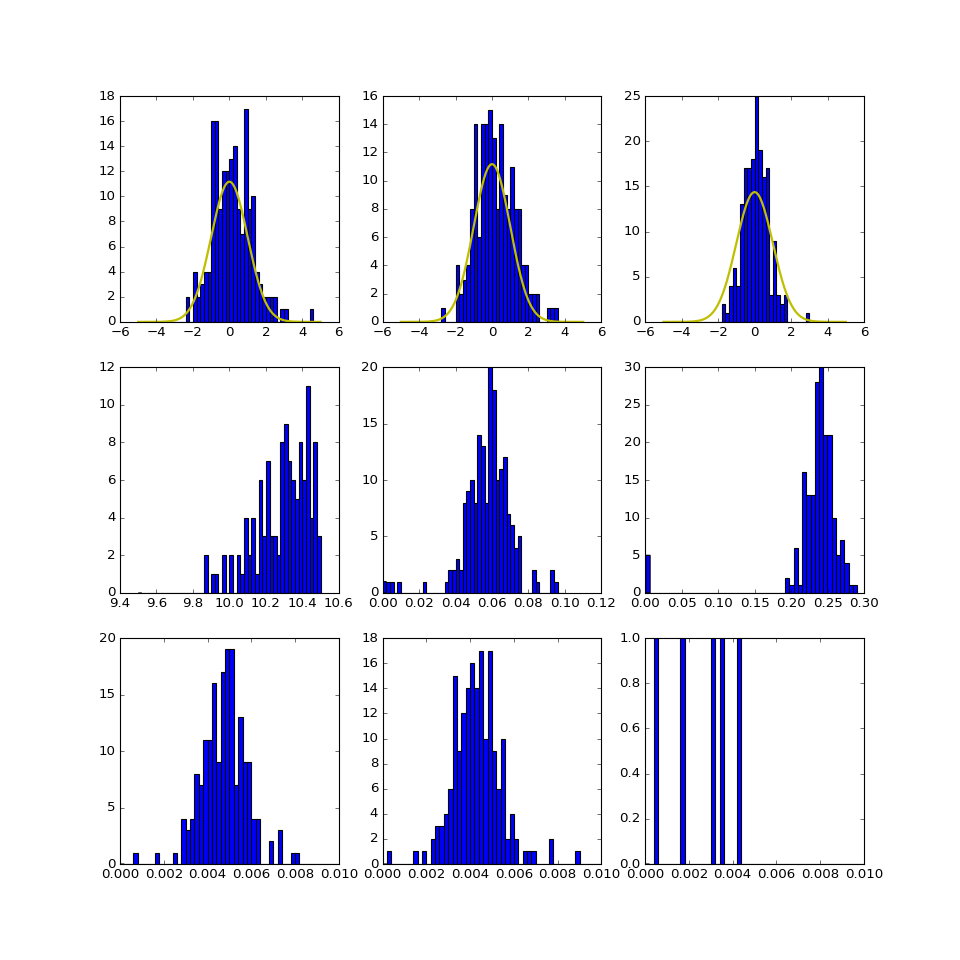

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.    ,  0.0002,  0.0004,  0.0006,  0.0008,  0.001 ,  0.0012,
         0.0014,  0.0016,  0.0018,  0.002 ,  0.0022,  0.0024,  0.0026,
         0.0028,  0.003 ,  0.0032,  0.0034,  0.0036,  0.0038,  0.004 ,
         0.0042,  0.0044,  0.0046,  0.0048,  0.005 ,  0.0052,  0.0054,
         0.0056,  0.0058,  0.006 ,  0.0062,  0.0064,  0.0066,  0.0068,
         0.007 ,  0.0072,  0.0074,  0.0076,  0.0078,  0.008 ,  0.0082,
         0.0084,  0.0086,  0.0088,  0.009 ,  0.0092,  0.0094,  0.0096,
         0.0098,  0.01  ]),
 <a list of 50 Patch objects>)

In [16]:
num_bins=50

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(pulls[0],bins=num_bins,range=(-5,5))
x = np.linspace(-5,5,1000)
y=normal(x,0,1)
plt.plot(x,(iteration*7/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,2)
plt.hist(pulls[1],bins=num_bins, range=(-5,5))
plt.plot(x,(iteration*7/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,3)
plt.hist(pulls[2],bins=num_bins, range=(-5, 5))  
plt.plot(x,(iteration*9/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,4)
plt.hist(fit_vals[0],bins=num_bins, range=(9.5,10.5))
plt.subplot(3,3,5)
plt.hist(fit_vals[1],bins=num_bins, range=(0,0.1))    

plt.subplot(3,3,6)
plt.hist(fit_vals[2],bins=num_bins)  

plt.subplot(3,3,7)
plt.hist(fit_uncerts[0],bins=num_bins, range=(0,.01))
plt.subplot(3,3,8)
plt.hist(fit_uncerts[1],bins=num_bins , range=(0,.01))    

plt.subplot(3,3,9)
plt.hist(fit_uncerts[2],bins=num_bins, range=(0,.01))

In [33]:
pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(1000)

<IPython.core.display.Javascript object>


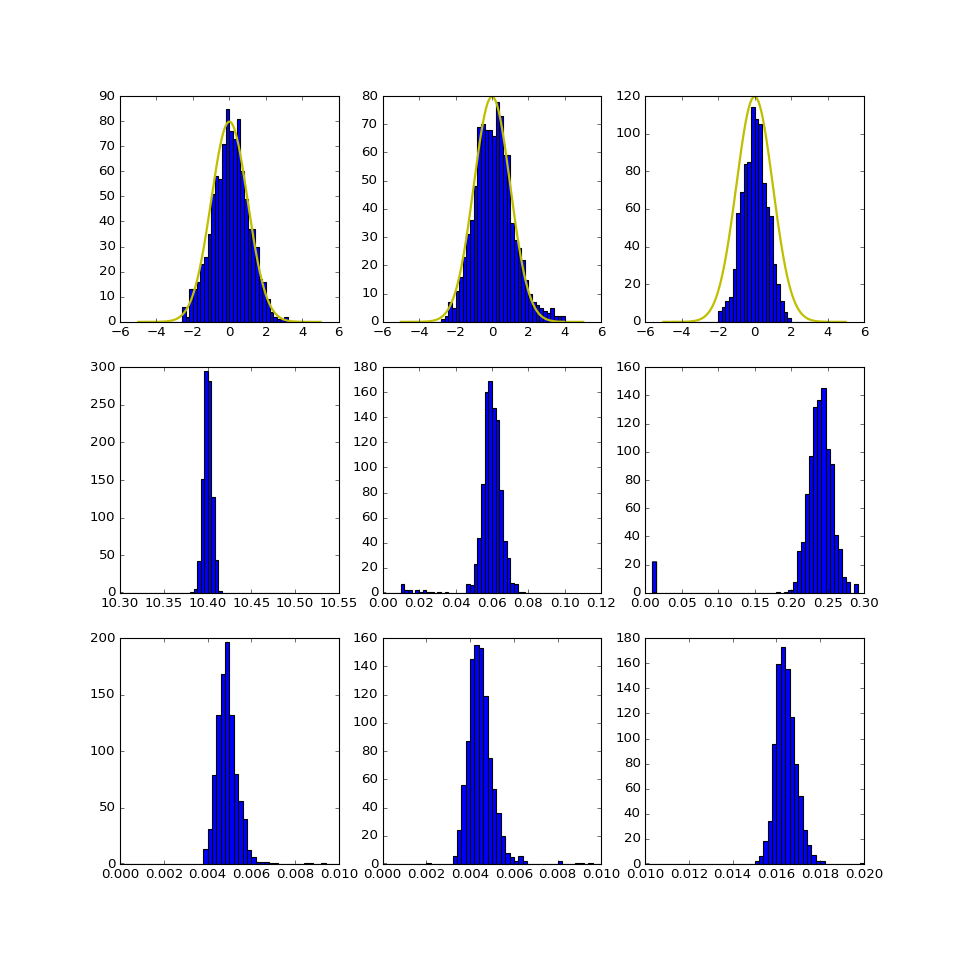

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    6.,
          18.,   34.,   96.,  159.,  173.,  155.,  117.,   80.,   54.,
          27.,   15.,    7.,    2.,    2.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 0.01  ,  0.0102,  0.0104,  0.0106,  0.0108,  0.011 ,  0.0112,
         0.0114,  0.0116,  0.0118,  0.012 ,  0.0122,  0.0124,  0.0126,
         0.0128,  0.013 ,  0.0132,  0.0134,  0.0136,  0.0138,  0.014 ,
         0.0142,  0.0144,  0.0146,  0.0148,  0.015 ,  0.0152,  0.0154,
         0.0156,  0.0158,  0.016 ,  0.0162,  0.0164,  0.0166,  0.0168,
         0.017 ,  0.0172,  0.0174,  0.0176,  0.0178,  0.018 ,  0.0182,
         0.0184,  0.0186,  0.0188,  0.019 ,  0.0192,  0.0194,  0.0196,
         0.0198,  0.02  ]),
 <a list of 50 Patch objects>)

In [39]:
num_bins=50

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.hist(pulls[0],bins=num_bins,range=(-5,5))
x = np.linspace(-5,5,1000)
y=normal(x,0,1)
plt.plot(x,(iteration*10/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,2)
plt.hist(pulls[1],bins=num_bins, range=(-5,5))
plt.plot(x,(iteration*10/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,3)
plt.hist(pulls[2],bins=num_bins, range=(-5, 5))  
plt.plot(x,(iteration*15/(num_bins))*y,'y-',linewidth=2)

plt.subplot(3,3,4)
plt.hist(fit_vals[0],bins=num_bins, range=(10.3,10.5))
plt.subplot(3,3,5)
plt.hist(fit_vals[1],bins=num_bins, range=(0,0.1))    

plt.subplot(3,3,6)
plt.hist(fit_vals[2],bins=num_bins)  

plt.subplot(3,3,7)
plt.hist(fit_uncerts[0],bins=num_bins, range=(0,.01))
plt.subplot(3,3,8)
plt.hist(fit_uncerts[1],bins=num_bins , range=(0,.01))    

plt.subplot(3,3,9)
plt.hist(fit_uncerts[2],bins=num_bins, range=(.01,.02))

In [16]:
x= np.random.normal(.06,.1)
print np.random.normal(10,x,100)

[ 10.10871818  10.01139157  10.00257644   9.92758374  10.0960773
  10.00638555   9.85645218  10.03817756   9.98555475   9.90672017
  10.0240402   10.09577505  10.08866777   9.94111773  10.04112458
   9.93999976  10.05433868   9.95061945   9.98866834   9.95314798
   9.88692512  10.05656824  10.14962861   9.81562972   9.88743209
   9.97871443  10.04747379   9.98014881   9.98086606   9.90695927
  10.05043842  10.01343865  10.0605396    9.91691081  10.02280744
  10.12801331   9.78747071   9.96515999  10.13615829  10.14372324
  10.10682948   9.99487472   9.93022811  10.0510683   10.00126295
   9.91672479   9.97403414   9.98716852  10.11177545   9.98875736
   9.94227116   9.96910896  10.01121657   9.83543439  10.01390616
  10.0497469    9.9803874   10.16064135  10.04272301   9.98778059
   9.869693     9.98204751   9.87625917  10.03751482  10.00549904
   9.92474654  10.15367814   9.92165289   9.86247091   9.93795158
   9.89709322   9.91147159  10.1032784    9.99122674  10.04147194
  10.035303